In [10]:
import numpy as np
import scipy as signal
import matplotlib.pyplot as plt
from PIL import Image

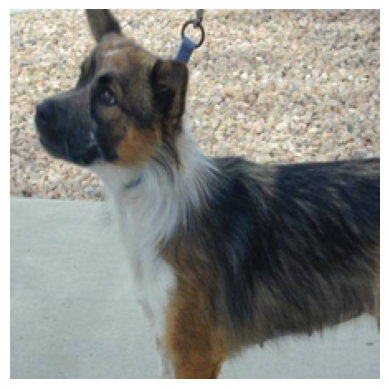

In [27]:
image_path = 'train/dog.3.jpg' 
image = Image.open(image_path)

# Resize the image
resized_image = image.resize((224, 224))

# If the image is not in RGB mode, convert it to RGB
if resized_image.mode != 'RGB':
    resized_image = resized_image.convert('RGB')

# Convert the resized image to a numpy array
image_array = np.array(resized_image)

# Display the resized image
plt.imshow(image_array)
plt.axis('off')
plt.show()


In [ ]:
# Data loading steps
#TO-DO - When sampling a random dog, we must concatenate multiple strings to create the necessary file path

dogs_num = 12499 # Starting from 0
cats_num = 12499 # Starting from zero

In [ ]:
# Setting up functions in forward propogation
# We will forward propogate one piece of data at a time, then average over the examples, to simulate batches

In [ ]:
def batch_norm_forward(x, gamma, beta, eps=1e-5):
    mean = np.mean(x, axis=0)
    variance = np.var(x, axis=0)
    x_normalized = (x - mean) / np.sqrt(variance + eps)
    out = gamma * x_normalized + beta
    cache = (x, x_normalized, mean, variance, gamma, beta, eps)
    return out, cache

def batch_norm_backward(dout, cache):
    x, x_normalized, mean, variance, gamma, beta, eps = cache
    N = x.shape[0]
    
    dbeta = np.sum(dout, axis=0)
    dgamma = np.sum(dout * x_normalized, axis=0)
    
    dx_normalized = dout * gamma
    dvariance = np.sum(dx_normalized * (x - mean) * -0.5 * np.power(variance + eps, -1.5), axis=0)
    dmean = np.sum(dx_normalized * -1 / np.sqrt(variance + eps), axis=0) + dvariance * np.sum(-2 * (x - mean), axis=0) / N
    
    dx = dx_normalized / np.sqrt(variance + eps) + dvariance * 2 * (x - mean) / N + dmean / N
    return dx, dgamma, dbeta

def max_pooling(input_data):
    # 24, 24, 2
    input_height, input_width, input_depth = input_data.shape

    # Calculate the output dimensions
    output_height = input_height // 2 # 12
    output_width = input_width // 2 # 12
    output_depth = input_depth # 2 - depth stays the same

    # Initialize the output array and array to store indices
    output_data = np.zeros((output_height, output_width, output_depth))
    indices = np.zeros((output_height, output_width, output_depth, 2), dtype=int)

    # Apply max pooling
    for h in range(output_height):
        for w in range(output_width):
            for d in range(output_depth):
                # Extract the 2x2 region of interest from the input data
                region = input_data[h*2:(h+1)*2, w*2:(w+1)*2, d]
                # Compute the maximum value in the region
                max_val = np.max(region)
                output_data[h, w, d] = max_val
                # Find the indices of the maximum value in the region
                max_indices = np.unravel_index(np.argmax(region), region.shape)
                # Store the indices relative to the region and convert to global indices
                indices[h, w, d] = [h*2 + max_indices[0], w*2 + max_indices[1]]

    return output_data, indices

def der_ReLU(Z):
  return Z > 0

def ReLU2(Z, alpha=0.01):
    return np.where(Z > 0, Z, alpha * Z)

def ReLU(Z): # Takes in a scalar, returns a scalar
    return np.maximum(Z, 0)

def ReLU2(Z): # Takes in a scalar, returns a scalar
    return np.maximum(Z, 0)

def sigmoid_prime(z):
  return sigmoid(z)*(1-sigmoid(z))

def sigmoid(z):
    # Compute the sigmoid function element-wise
    return 1.0 / (1.0 + np.exp(-z))

def softmax(Z):
    # Apply softmax column-wise
    exp_Z = np.exp(Z - np.max(Z, axis=0))  # Subtracting the maximum value in each column to avoid overflow
    return exp_Z / np.sum(exp_Z, axis=0)


In [28]:
# Parameters
# Convolutional layer -> ReLU activation -> Batch normalization -> Dropout -> Max pooling
# Layer 1
conv1_1_kernel = np.random.randn(3, 3, 64)
conv1_1_bias = np.zeros((222, 222, 64))
layer1_1_output = np.zeros((18, 18, 512))
conv1_2_kernel = np.random.randn(3, 3, 64)
conv1_2_bias = np.zeros((220, 220, 64))
layer1_2_output = np.zeros((18, 18, 512))
gamma1_conv = np.ones((24, 24, 2))
beta1_conv = np.zeros((24, 24, 2))

# Layer 2
conv2_1_kernel = np.random.randn(3, 3, 128)
conv2_1_bias = np.zeros((108, 108, 128))
layer2_1_output = np.zeros((18, 18, 512))
conv2_2_kernel = np.random.randn(3, 3, 128)
conv2_2_bias = np.zeros((106, 106, 128))
layer2_2_output = np.zeros((18, 18, 512))
conv2_3_kernel = np.random.randn(3, 3, 128)
conv2_3_bias = np.zeros((104, 104, 128))
layer2_3_output = np.zeros((18, 18, 512))
gamma2_conv = np.ones((24, 24, 2))
beta2_conv = np.zeros((24, 24, 2))

# Layer 3
conv3_1_kernel = np.random.randn(3, 3, 256)
conv3_1_bias = np.zeros((50, 50, 256))
layer3_2_output = np.zeros((18, 18, 512))
conv3_2_kernel = np.random.randn(3, 3, 256)
conv3_1_bias = np.zeros((48, 48, 128))
layer3_2_output = np.zeros((18, 18, 512))
gamma3_conv = np.ones((24, 24, 2))
beta3_conv = np.zeros((24, 24, 2))


# Layer 4
conv4_1_kernel = np.random.randn(3, 3, 512)
conv4_1_bias = np.zeros((22, 22, 512))
layer4_1_output = np.zeros((22, 22, 512))
conv4_2_kernel = np.random.randn(3, 3, 512)
conv4_2_bias = np.zeros((20, 20, 512))
layer4_2_output = np.zeros((20, 20, 512))
conv4_3_kernel = np.random.randn(3, 3, 512)
conv4_3_bias = np.zeros((18, 18, 512))
layer4_3_output = np.zeros((18, 18, 512))
gamma4_conv = np.ones((24, 24, 2))
beta4_conv = np.zeros((24, 24, 2))

# Layer 5
conv5_1_kernel = np.random.randn(3, 3, 512)
conv5_1_bias = np.zeros((7, 7, 512))
layer5_1_output = np.zeros((18, 18, 512))
conv5_2_kernel = np.random.randn(3, 3, 512)
conv5_2_bias = np.zeros((5, 5, 512))
layer5_2_output = np.zeros((18, 18, 512))
gamma5_conv = np.ones((24, 24, 2))
beta5_conv = np.zeros((24, 24, 2))

# Layer 6
fc1_weights = np.random.randn(12800, 4096)
fc1_bias = np.zeros(4096)
layer6_1_output = np.zeros((18, 18, 512))
fc2_weights = np.random.randn(4096, 2)
fc2_bias = np.zeros(2)
layer6_2_output = np.zeros((18, 18, 512))
